In [1]:
import os
import json
import sys
import matplotlib.pyplot as plt
import numpy as np

# Append project to path
root_dir = os.path.join(os.getcwd(), "..")
sys.path.append(root_dir)

In [2]:
# read config
path = "/Users/lichenghu/desktop/DSC180A-Project1/config/example_config.json"
with open(path) as json_file:
    config = json.load(json_file)
# config['data']['path'] = "../data"

In [3]:
config['model']['save_path']="/Users/lichenghu/desktop/DSC180A-Project1/models/resnet18.pth"

In [4]:
config

{'experiment_name': 'test',
 'data': {'path': './data',
  'dataset': 'mnist',
  'image_channels': 1,
  'num_classes': 10,
  'batch_size': 512,
  'num_workers': 2,
  'val_split': 0.2},
 'model': {'type': 'resnet18',
  'num_blocks': [2, 2, 2, 2],
  'save_path': '/Users/lichenghu/desktop/DSC180A-Project1/models/resnet18.pth'},
 'optimizer': {'type': 'sgd',
  'lr': 0.0001,
  'momentum': 0.9,
  'weight_decay': 0.0001,
  'nestrov': False},
 'training': {'epochs': 15, 'criterion': 'cross_entropy'},
 'visualize': {'perform': False, 'save_path': './reports/figures/'}}

In [5]:
from src.model.get_model import get_model
model = get_model(config)

Creating model...
Model resnet18 created


In [6]:
from src.model.model_files import read_model
read_model(model, config)

Model read successfully from /Users/lichenghu/desktop/DSC180A-Project1/models/resnet18.pth


In [7]:
model

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=

### How to obtain weights?

In [8]:
# linear layer weight
model.linear.weight.data.shape

torch.Size([10, 512])

In [9]:
# first conv2d
model.conv1.weight.data.shape

torch.Size([64, 1, 3, 3])

In [25]:
# the first conv2d in first block
model.conv1.weight.data.shape

torch.Size([64, 1, 3, 3])

# $w^T w$

In [11]:
model.linear.weight.data

tensor([[ 0.0344, -0.0341, -0.0299,  ..., -0.0188,  0.0418, -0.0383],
        [ 0.0222,  0.0287, -0.0290,  ...,  0.0384,  0.0399, -0.0370],
        [-0.0147, -0.0461,  0.0534,  ...,  0.0019,  0.0036,  0.0193],
        ...,
        [-0.0006, -0.0141,  0.0158,  ...,  0.0557, -0.0191, -0.0150],
        [ 0.0370,  0.0264, -0.0235,  ..., -0.0332, -0.0282,  0.0378],
        [-0.0176,  0.0558,  0.0408,  ...,  0.0368, -0.0055,  0.0433]])

In [12]:
model.linear.weight.data.shape

torch.Size([10, 512])

In [13]:
model.layer1[0].conv1.weight.data.shape

torch.Size([64, 64, 3, 3])

In [14]:
model.layer1[0].conv1.weight.data.shape

torch.Size([64, 64, 3, 3])

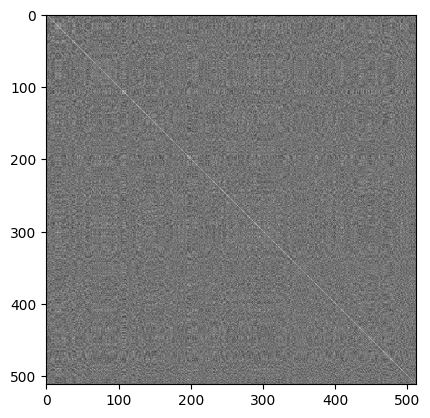

In [15]:
import matplotlib.pyplot as plt
w = model.linear.weight.data
plt.title("")
plt.imshow(w.T@w, cmap = "gray")

In [16]:
w0=model.layer1[0].conv1.weight.data

In [17]:
w_sum=w0.sum(axis=0)
w_sum.shape

torch.Size([64, 3, 3])

In [26]:
c_out, c_in, p, q = model.layer1[0].conv1.weight.data.shape
M = model.conv1.weight.data.reshape(c_out, -1)

In [27]:
M.shape

torch.Size([64, 9])

In [29]:
x=M.T@M
x.shape

torch.Size([9, 9])

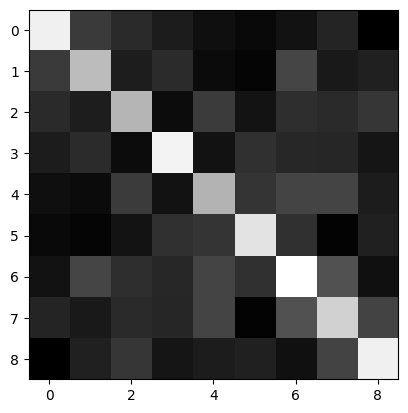

In [28]:
plt.imshow(M.T@M,cmap="gray")

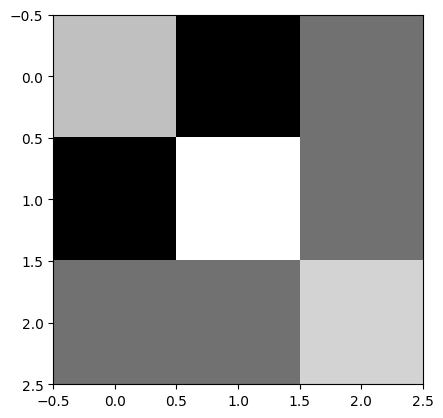

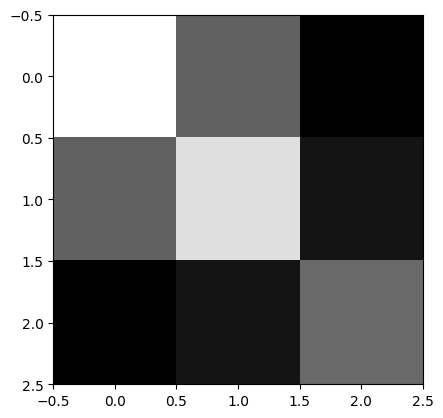

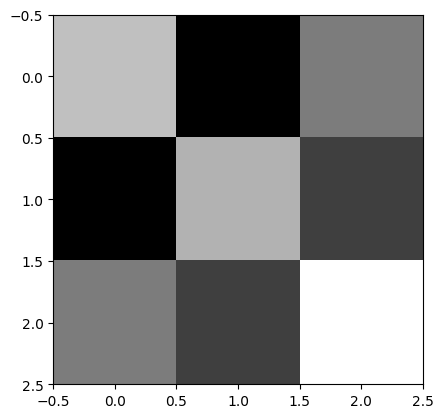

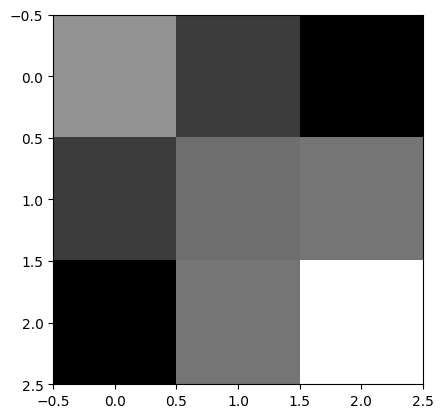

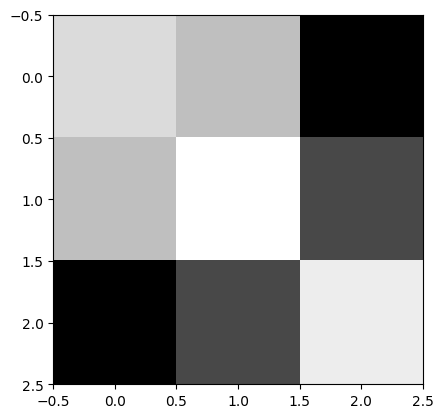

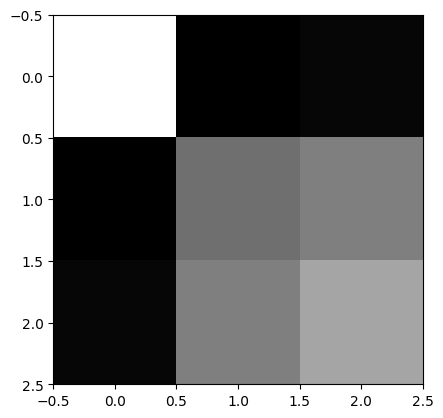

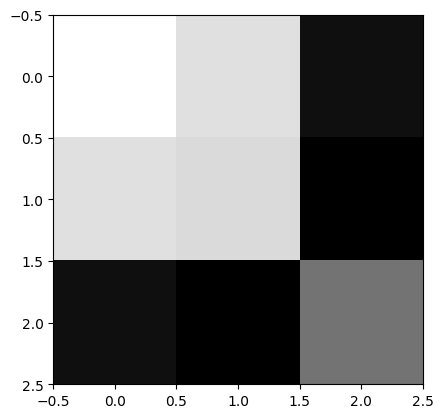

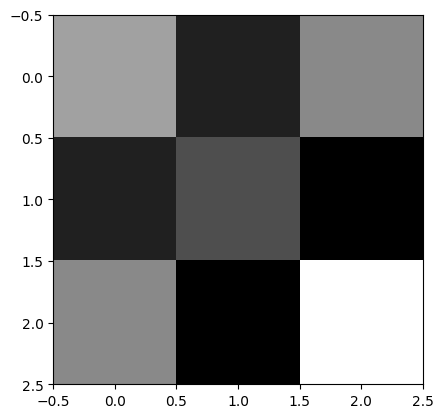

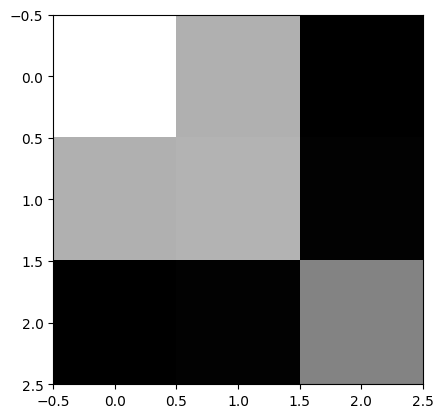

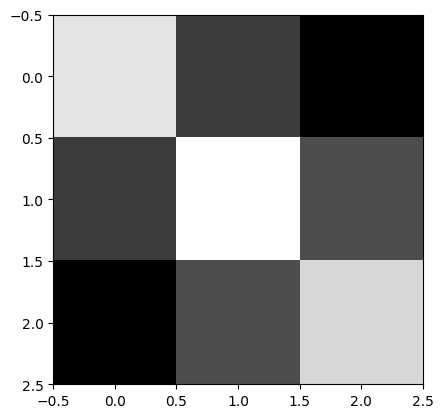

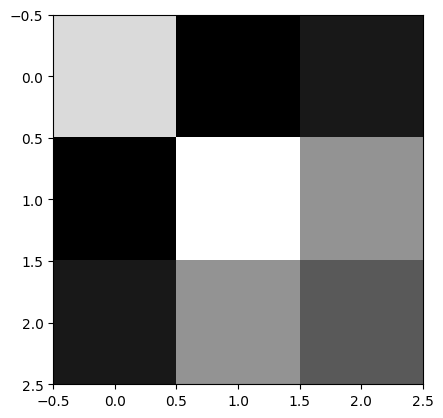

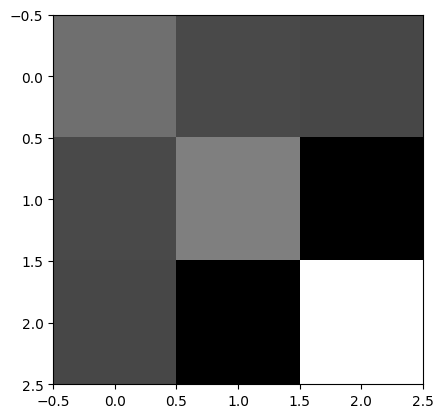

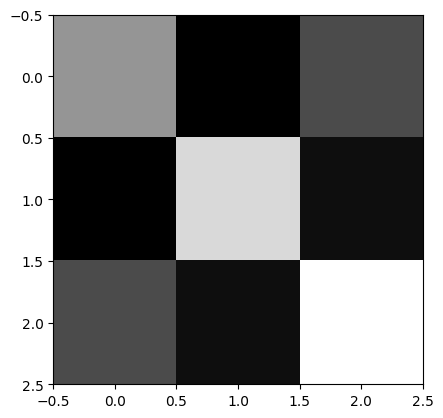

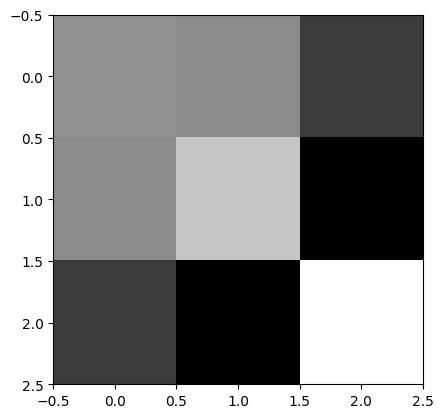

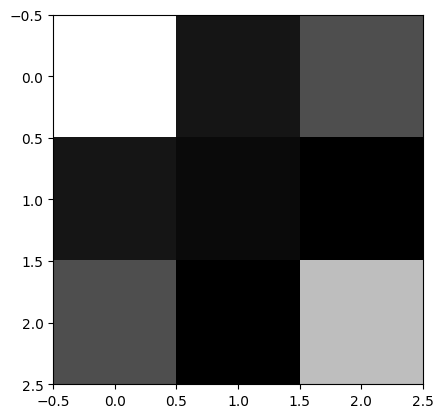

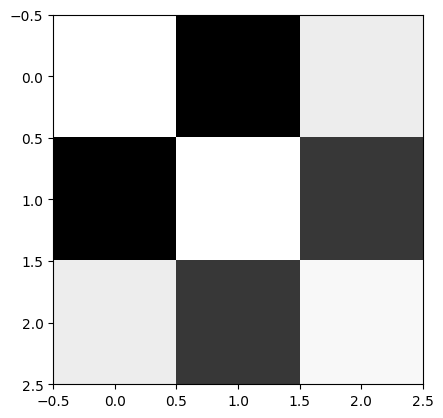

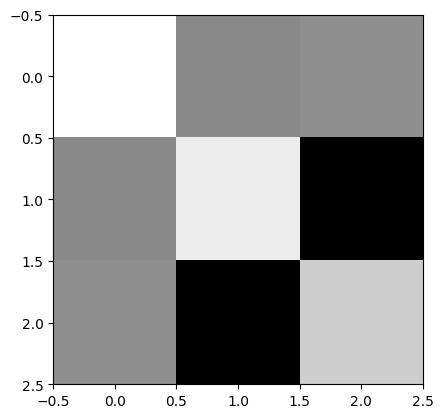

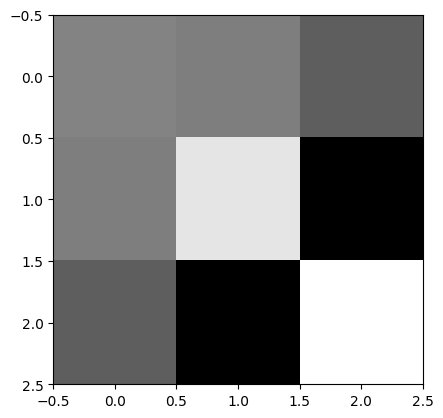

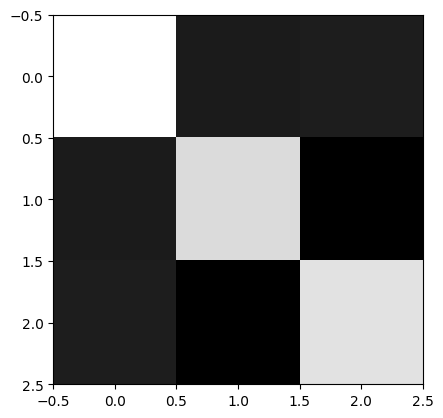

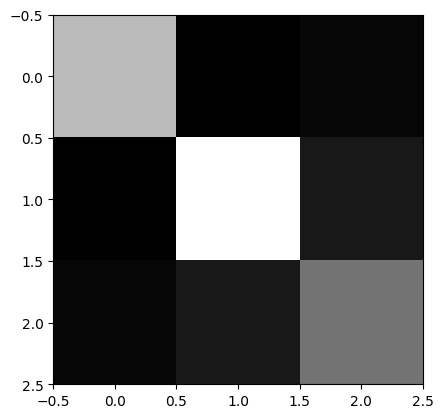

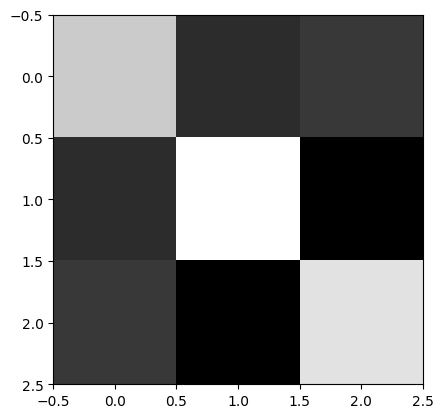

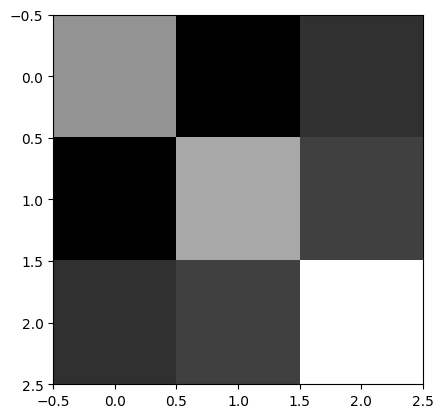

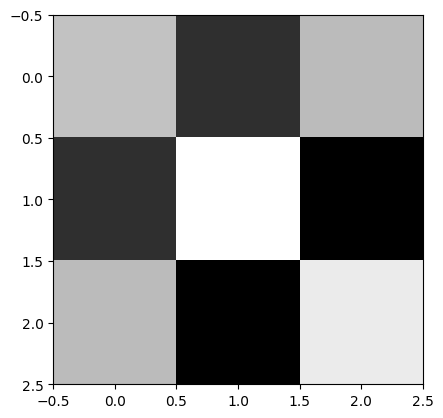

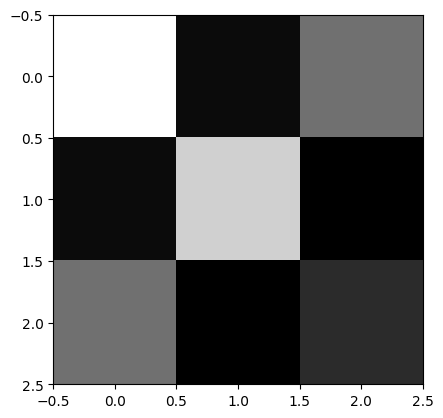

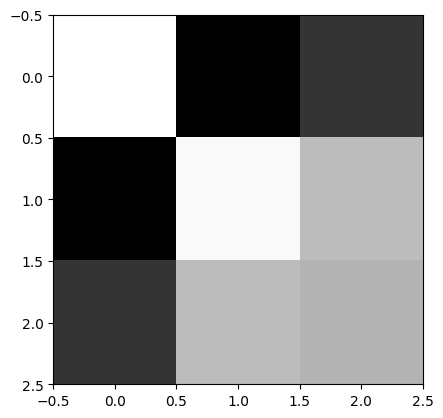

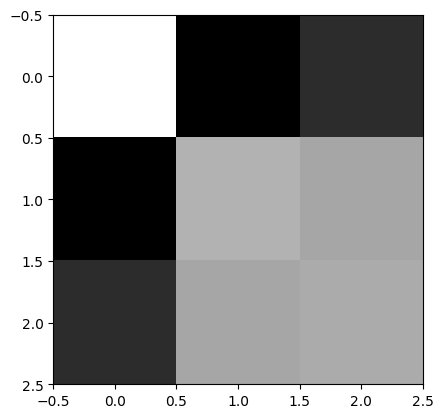

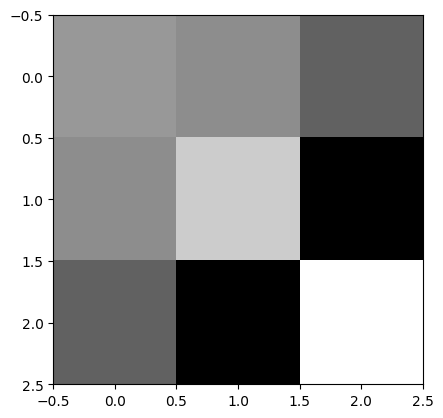

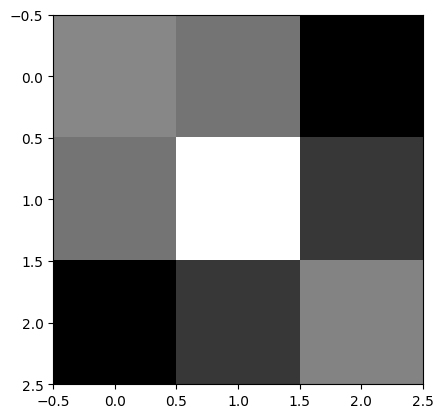

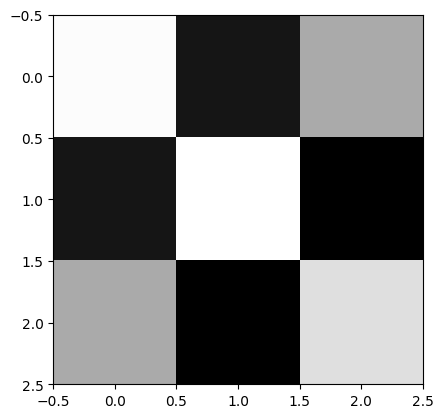

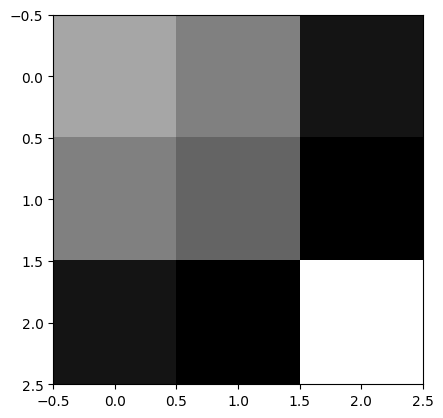

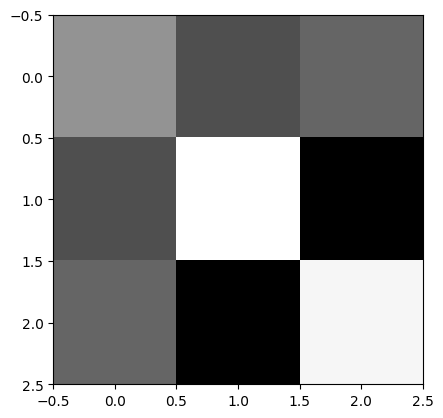

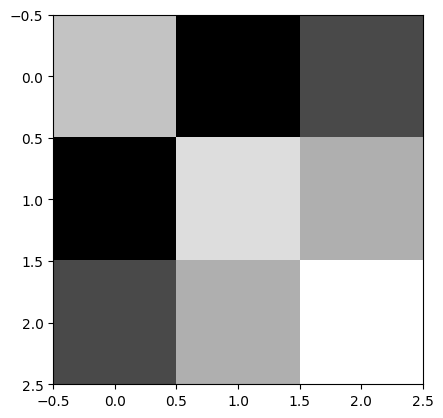

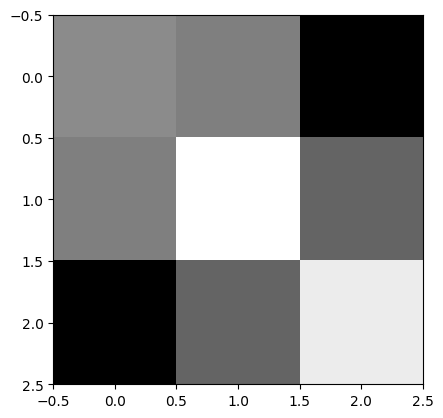

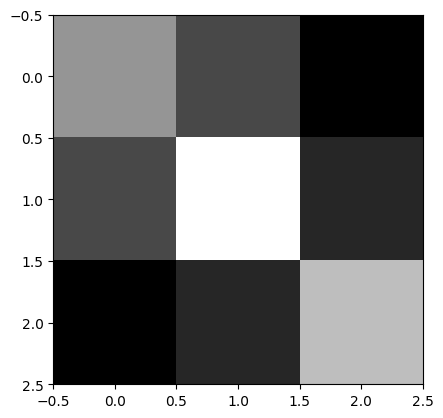

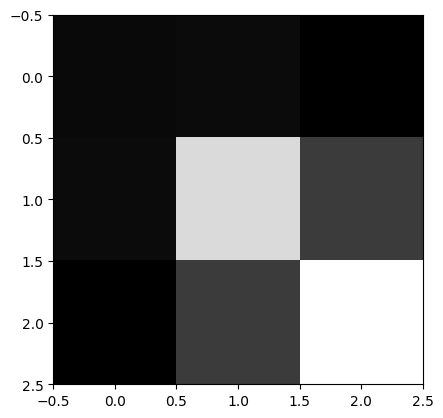

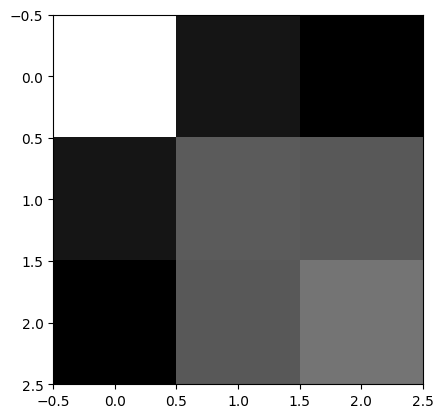

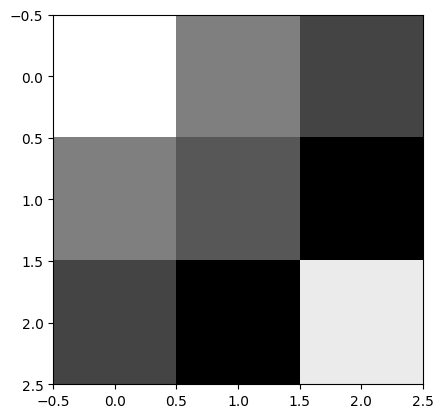

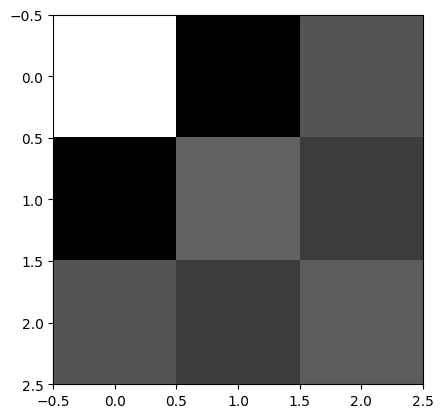

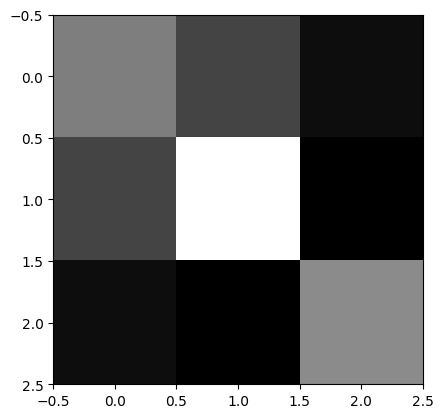

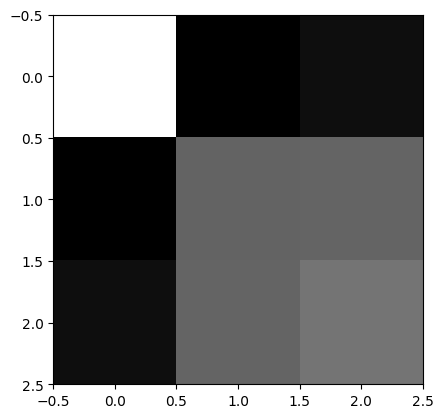

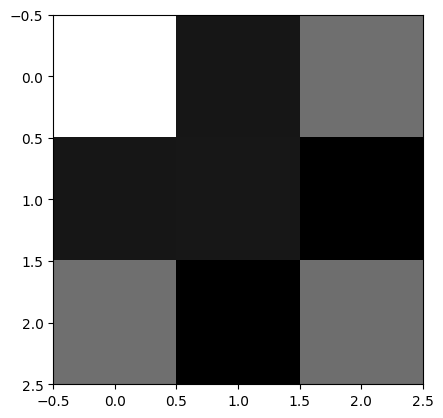

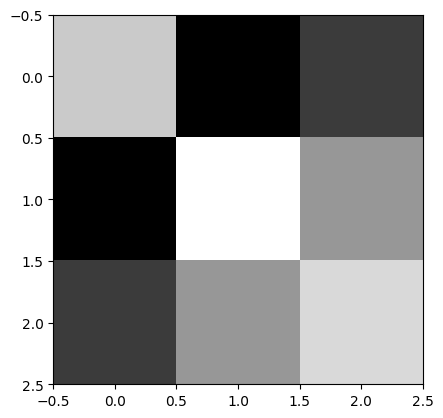

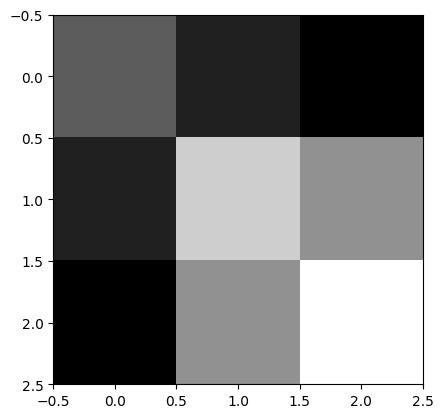

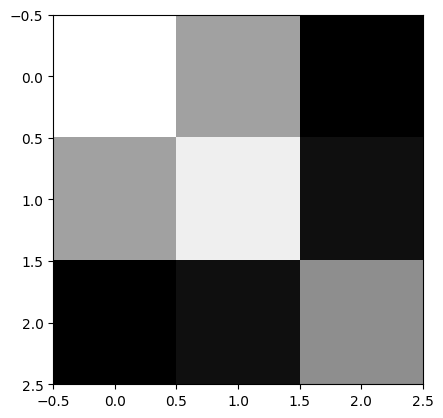

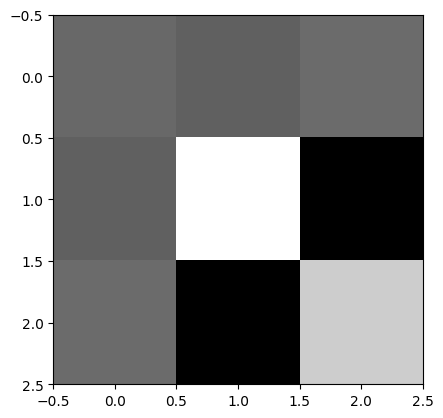

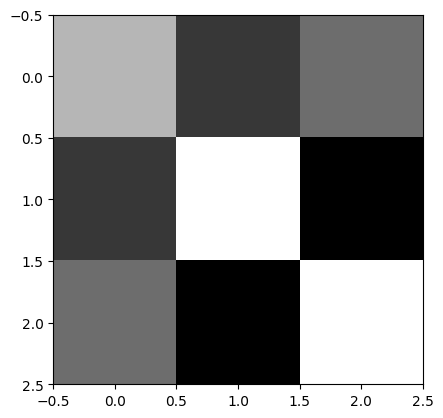

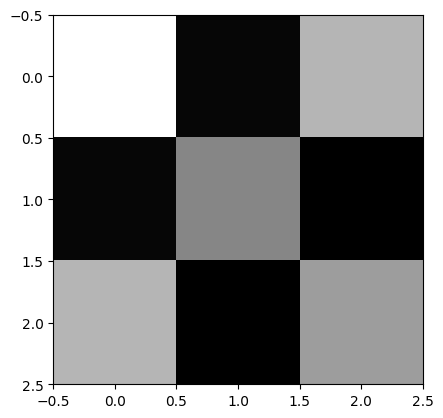

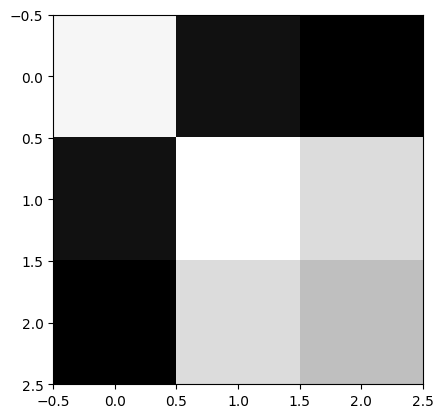

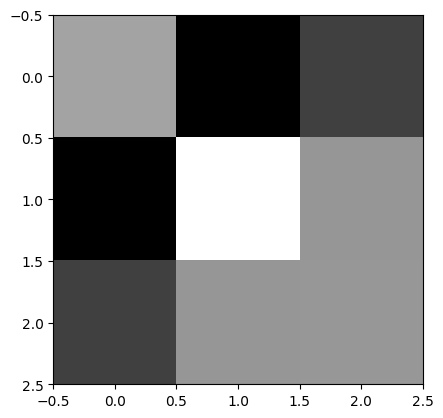

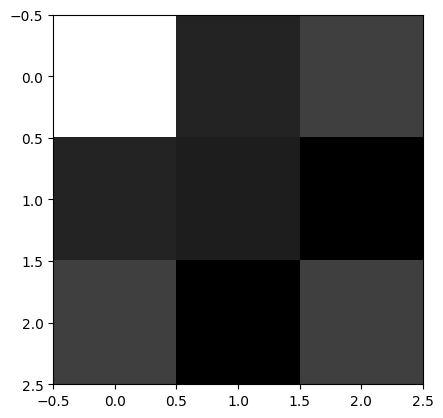

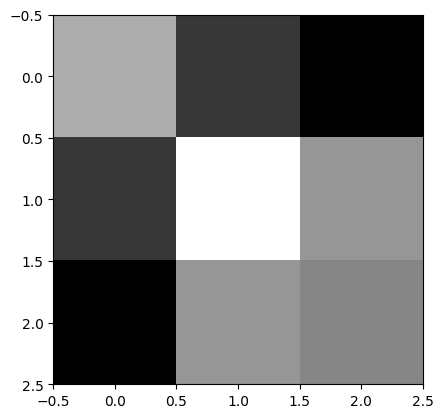

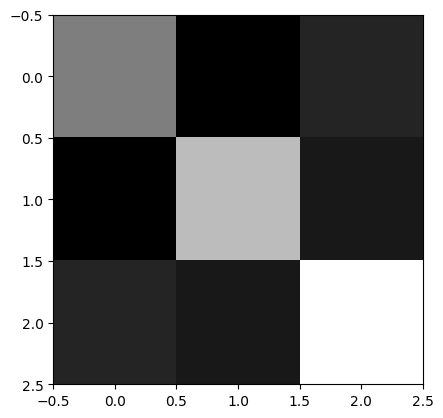

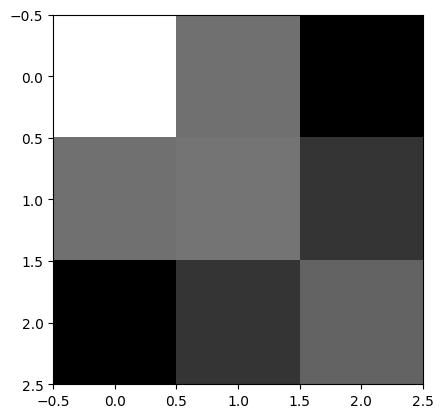

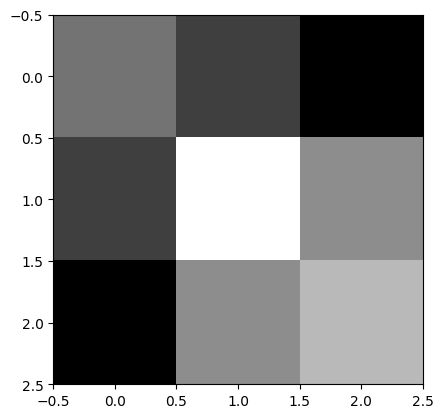

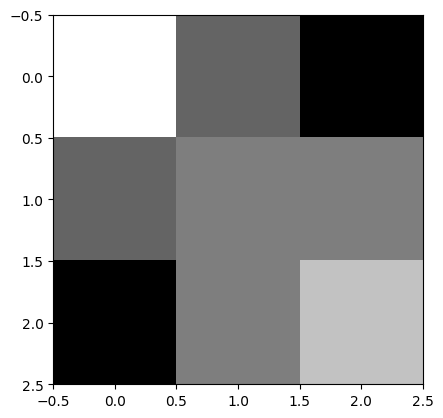

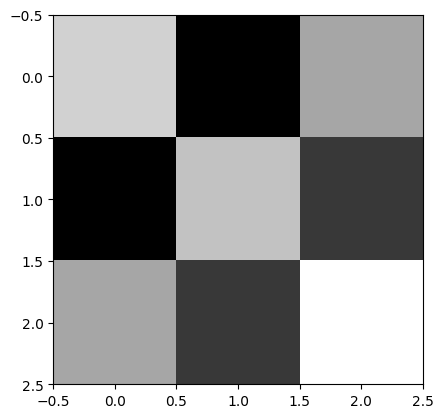

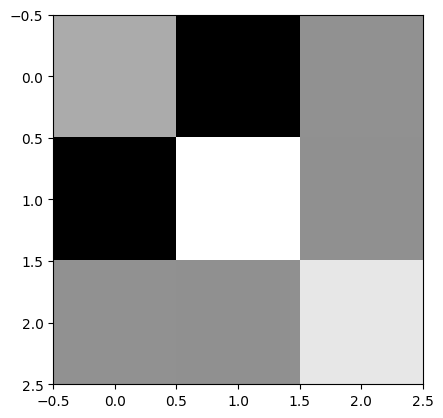

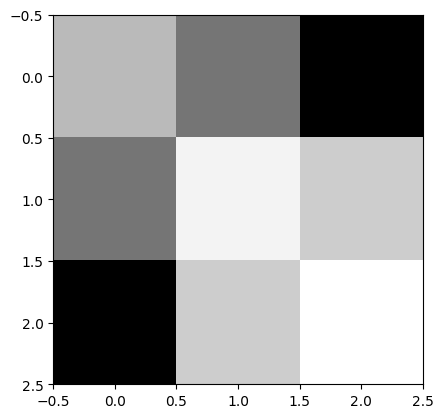

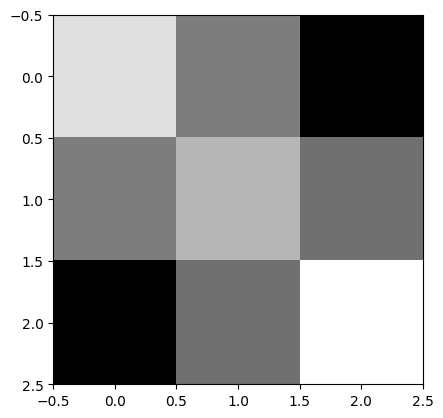

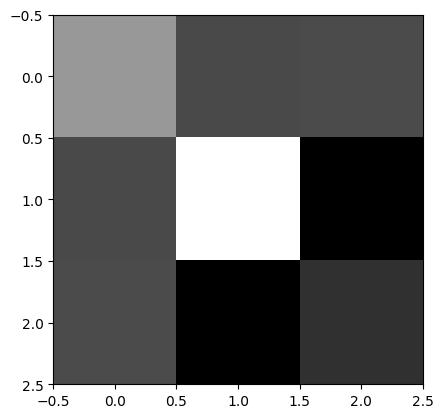

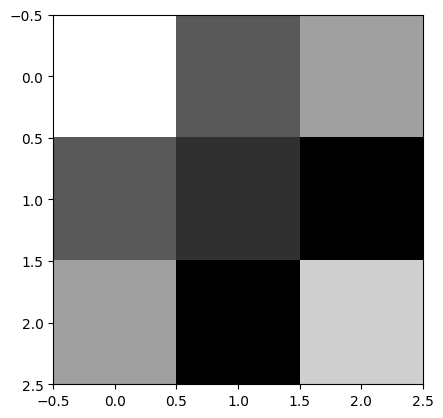

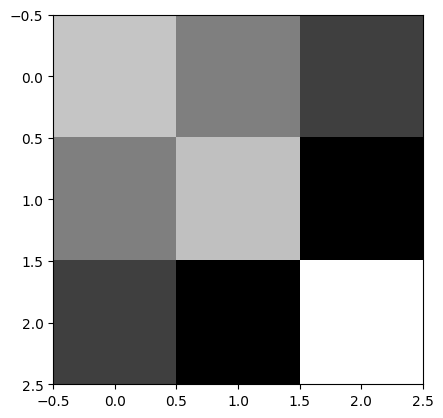

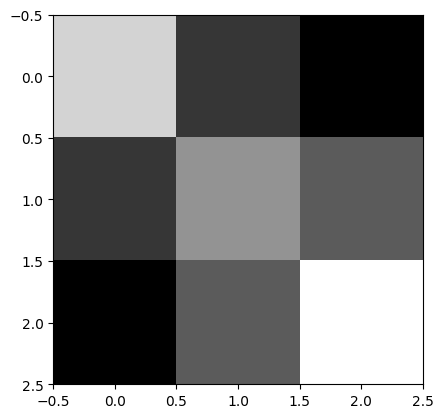

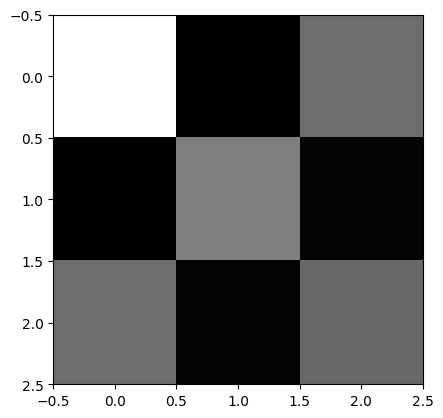

In [22]:
for i in model.layer1[0].conv1.weight.data:
    w=i[0]
    plt.imshow(w.T@w,cmap="gray")
    plt.show()